## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  26.751115  1545.512631  0.485824   8.159914  1.546920
1  63.290113   131.369054  0.773719  10.543609  0.975288
2  18.066361   656.242154  0.789516   1.490621  1.747119
3  10.750075  1628.748320  0.594349   9.047482  1.433174
4  81.420461   764.696623  0.524201  10.348942  1.295129


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.1704  | train_mse: 4.69702 | train_mae: 1.55076 |  0:00:00s
epoch 1  | loss: 0.89309 | train_mse: 1.83943 | train_mae: 1.03939 |  0:00:00s
epoch 2  | loss: 0.54194 | train_mse: 2.07218 | train_mae: 1.05562 |  0:00:00s


epoch 3  | loss: 0.59007 | train_mse: 1.94366 | train_mae: 1.03583 |  0:00:00s
epoch 4  | loss: 0.65861 | train_mse: 1.05965 | train_mae: 0.81507 |  0:00:00s
epoch 5  | loss: 0.43581 | train_mse: 1.23313 | train_mae: 0.8853  |  0:00:00s


epoch 6  | loss: 0.46802 | train_mse: 1.0998  | train_mae: 0.78094 |  0:00:00s
epoch 7  | loss: 0.41809 | train_mse: 1.16723 | train_mae: 0.83477 |  0:00:00s
epoch 8  | loss: 0.33236 | train_mse: 1.16476 | train_mae: 0.88053 |  0:00:00s


epoch 9  | loss: 0.3596  | train_mse: 1.13833 | train_mae: 0.85999 |  0:00:01s
epoch 10 | loss: 0.45893 | train_mse: 1.25213 | train_mae: 0.89354 |  0:00:01s


epoch 11 | loss: 0.42902 | train_mse: 0.7012  | train_mae: 0.68326 |  0:00:01s
epoch 12 | loss: 0.31472 | train_mse: 0.65966 | train_mae: 0.6537  |  0:00:01s


epoch 13 | loss: 0.33149 | train_mse: 0.76653 | train_mae: 0.66561 |  0:00:01s
epoch 14 | loss: 0.28127 | train_mse: 1.27356 | train_mae: 0.84439 |  0:00:01s


epoch 15 | loss: 0.32894 | train_mse: 1.36824 | train_mae: 0.84741 |  0:00:01s
epoch 16 | loss: 0.29737 | train_mse: 1.23667 | train_mae: 0.80263 |  0:00:01s


epoch 17 | loss: 0.29992 | train_mse: 0.64185 | train_mae: 0.60977 |  0:00:01s
epoch 18 | loss: 0.39997 | train_mse: 0.44262 | train_mae: 0.51103 |  0:00:02s
epoch 19 | loss: 0.51071 | train_mse: 0.51818 | train_mae: 0.53054 |  0:00:02s


epoch 20 | loss: 0.36376 | train_mse: 0.40491 | train_mae: 0.48919 |  0:00:02s
epoch 21 | loss: 0.29817 | train_mse: 0.44749 | train_mae: 0.51849 |  0:00:02s
epoch 22 | loss: 0.48005 | train_mse: 0.60778 | train_mae: 0.61032 |  0:00:02s


epoch 23 | loss: 0.29991 | train_mse: 0.5241  | train_mae: 0.57959 |  0:00:02s
epoch 24 | loss: 0.30078 | train_mse: 0.36802 | train_mae: 0.48601 |  0:00:02s
epoch 25 | loss: 0.27591 | train_mse: 0.30132 | train_mae: 0.42875 |  0:00:02s


epoch 26 | loss: 0.26097 | train_mse: 0.28071 | train_mae: 0.43094 |  0:00:02s
epoch 27 | loss: 0.28694 | train_mse: 0.24546 | train_mae: 0.38714 |  0:00:02s
epoch 28 | loss: 0.23651 | train_mse: 0.339   | train_mae: 0.40386 |  0:00:02s


epoch 29 | loss: 0.34936 | train_mse: 0.21446 | train_mae: 0.35084 |  0:00:03s
epoch 30 | loss: 0.22736 | train_mse: 0.20945 | train_mae: 0.36179 |  0:00:03s
epoch 31 | loss: 0.21264 | train_mse: 0.23902 | train_mae: 0.39241 |  0:00:03s


epoch 32 | loss: 0.18882 | train_mse: 0.20977 | train_mae: 0.34569 |  0:00:03s
epoch 33 | loss: 0.22267 | train_mse: 0.2321  | train_mae: 0.34751 |  0:00:03s
epoch 34 | loss: 0.13952 | train_mse: 0.28409 | train_mae: 0.38741 |  0:00:03s


epoch 35 | loss: 0.25471 | train_mse: 0.26559 | train_mae: 0.39078 |  0:00:03s
epoch 36 | loss: 0.25077 | train_mse: 0.24444 | train_mae: 0.38101 |  0:00:03s
epoch 37 | loss: 0.18341 | train_mse: 0.22556 | train_mae: 0.36092 |  0:00:03s


epoch 38 | loss: 0.17236 | train_mse: 0.20828 | train_mae: 0.34841 |  0:00:03s
epoch 39 | loss: 0.1807  | train_mse: 0.19166 | train_mae: 0.33268 |  0:00:03s
epoch 40 | loss: 0.19874 | train_mse: 0.19255 | train_mae: 0.33918 |  0:00:04s


epoch 41 | loss: 0.17822 | train_mse: 0.16582 | train_mae: 0.32021 |  0:00:04s
epoch 42 | loss: 0.17624 | train_mse: 0.14039 | train_mae: 0.29184 |  0:00:04s
epoch 43 | loss: 0.22523 | train_mse: 0.13875 | train_mae: 0.2833  |  0:00:04s


epoch 44 | loss: 0.15041 | train_mse: 0.13131 | train_mae: 0.28679 |  0:00:04s
epoch 45 | loss: 0.29164 | train_mse: 0.14192 | train_mae: 0.29167 |  0:00:04s
epoch 46 | loss: 0.11995 | train_mse: 0.14526 | train_mae: 0.29372 |  0:00:04s


epoch 47 | loss: 0.19609 | train_mse: 0.12263 | train_mae: 0.27962 |  0:00:04s
epoch 48 | loss: 0.18809 | train_mse: 0.12184 | train_mae: 0.27729 |  0:00:04s
epoch 49 | loss: 0.21588 | train_mse: 0.0956  | train_mae: 0.2419  |  0:00:04s


epoch 50 | loss: 0.12671 | train_mse: 0.09245 | train_mae: 0.24084 |  0:00:04s
epoch 51 | loss: 0.12396 | train_mse: 0.10854 | train_mae: 0.2667  |  0:00:04s


epoch 52 | loss: 0.13433 | train_mse: 0.09671 | train_mae: 0.24998 |  0:00:05s
epoch 53 | loss: 0.17399 | train_mse: 0.1196  | train_mae: 0.27311 |  0:00:05s
epoch 54 | loss: 0.15184 | train_mse: 0.13721 | train_mae: 0.28528 |  0:00:05s


epoch 55 | loss: 0.12988 | train_mse: 0.16813 | train_mae: 0.31407 |  0:00:05s
epoch 56 | loss: 0.12994 | train_mse: 0.13496 | train_mae: 0.28627 |  0:00:05s
epoch 57 | loss: 0.19286 | train_mse: 0.12313 | train_mae: 0.26898 |  0:00:05s


epoch 58 | loss: 0.1184  | train_mse: 0.1468  | train_mae: 0.29423 |  0:00:05s
epoch 59 | loss: 0.20042 | train_mse: 0.19548 | train_mae: 0.31547 |  0:00:05s
epoch 60 | loss: 0.22813 | train_mse: 0.14459 | train_mae: 0.27674 |  0:00:05s


epoch 61 | loss: 0.34492 | train_mse: 0.10818 | train_mae: 0.27206 |  0:00:05s
epoch 62 | loss: 0.18807 | train_mse: 0.10535 | train_mae: 0.26182 |  0:00:05s
epoch 63 | loss: 0.22046 | train_mse: 0.10994 | train_mae: 0.26085 |  0:00:05s


epoch 64 | loss: 0.15107 | train_mse: 0.09324 | train_mae: 0.24431 |  0:00:06s
epoch 65 | loss: 0.18532 | train_mse: 0.10118 | train_mae: 0.25516 |  0:00:06s
epoch 66 | loss: 0.18306 | train_mse: 0.09854 | train_mae: 0.25957 |  0:00:06s


epoch 67 | loss: 0.19173 | train_mse: 0.12083 | train_mae: 0.28257 |  0:00:06s
epoch 68 | loss: 0.23418 | train_mse: 0.10684 | train_mae: 0.25686 |  0:00:06s
epoch 69 | loss: 0.12839 | train_mse: 0.09387 | train_mae: 0.24514 |  0:00:06s


epoch 70 | loss: 0.12411 | train_mse: 0.08467 | train_mae: 0.23388 |  0:00:06s
epoch 71 | loss: 0.12858 | train_mse: 0.08254 | train_mae: 0.23053 |  0:00:06s
epoch 72 | loss: 0.13827 | train_mse: 0.07802 | train_mae: 0.21706 |  0:00:06s


epoch 73 | loss: 0.1055  | train_mse: 0.10236 | train_mae: 0.23437 |  0:00:06s
epoch 74 | loss: 0.10121 | train_mse: 0.09416 | train_mae: 0.22765 |  0:00:06s
epoch 75 | loss: 0.2079  | train_mse: 0.06901 | train_mae: 0.20904 |  0:00:07s


epoch 76 | loss: 0.1686  | train_mse: 0.08242 | train_mae: 0.22594 |  0:00:07s
epoch 77 | loss: 0.23861 | train_mse: 0.13659 | train_mae: 0.28435 |  0:00:07s
epoch 78 | loss: 0.11374 | train_mse: 0.13784 | train_mae: 0.28908 |  0:00:07s


epoch 79 | loss: 0.1374  | train_mse: 0.10319 | train_mae: 0.25647 |  0:00:07s
epoch 80 | loss: 0.18838 | train_mse: 0.09207 | train_mae: 0.23771 |  0:00:07s
epoch 81 | loss: 0.08953 | train_mse: 0.10377 | train_mae: 0.244   |  0:00:07s


epoch 82 | loss: 0.17028 | train_mse: 0.12147 | train_mae: 0.26962 |  0:00:07s
epoch 83 | loss: 0.11282 | train_mse: 0.11329 | train_mae: 0.2578  |  0:00:07s
epoch 84 | loss: 0.1275  | train_mse: 0.09502 | train_mae: 0.24611 |  0:00:07s


epoch 85 | loss: 0.15958 | train_mse: 0.08271 | train_mae: 0.23042 |  0:00:07s
epoch 86 | loss: 0.14766 | train_mse: 0.06946 | train_mae: 0.21319 |  0:00:07s


epoch 87 | loss: 0.12929 | train_mse: 0.06955 | train_mae: 0.21207 |  0:00:08s
epoch 88 | loss: 0.09449 | train_mse: 0.10099 | train_mae: 0.25635 |  0:00:08s


epoch 89 | loss: 0.14533 | train_mse: 0.07968 | train_mae: 0.22647 |  0:00:08s
epoch 90 | loss: 0.11203 | train_mse: 0.06542 | train_mae: 0.20667 |  0:00:08s


epoch 91 | loss: 0.15636 | train_mse: 0.06879 | train_mae: 0.21223 |  0:00:08s
epoch 92 | loss: 0.14481 | train_mse: 0.09443 | train_mae: 0.2331  |  0:00:08s
epoch 93 | loss: 0.13061 | train_mse: 0.12091 | train_mae: 0.25413 |  0:00:08s


epoch 94 | loss: 0.16169 | train_mse: 0.1219  | train_mae: 0.257   |  0:00:08s
epoch 95 | loss: 0.17591 | train_mse: 0.11521 | train_mae: 0.25838 |  0:00:08s
epoch 96 | loss: 0.11833 | train_mse: 0.08915 | train_mae: 0.24575 |  0:00:09s


epoch 97 | loss: 0.19403 | train_mse: 0.07672 | train_mae: 0.23024 |  0:00:09s
epoch 98 | loss: 0.15237 | train_mse: 0.07655 | train_mae: 0.22704 |  0:00:09s
epoch 99 | loss: 0.13047 | train_mse: 0.07897 | train_mae: 0.22904 |  0:00:09s


epoch 100| loss: 0.09283 | train_mse: 0.09059 | train_mae: 0.24359 |  0:00:09s
epoch 101| loss: 0.10037 | train_mse: 0.10046 | train_mae: 0.25479 |  0:00:09s
epoch 102| loss: 0.11809 | train_mse: 0.12806 | train_mae: 0.27462 |  0:00:09s


epoch 103| loss: 0.10141 | train_mse: 0.09581 | train_mae: 0.23901 |  0:00:09s
epoch 104| loss: 0.09028 | train_mse: 0.08663 | train_mae: 0.23734 |  0:00:09s


epoch 105| loss: 0.27423 | train_mse: 0.08649 | train_mae: 0.24054 |  0:00:09s
epoch 106| loss: 0.11536 | train_mse: 0.09017 | train_mae: 0.2411  |  0:00:09s


epoch 107| loss: 0.11531 | train_mse: 0.07505 | train_mae: 0.22122 |  0:00:10s
epoch 108| loss: 0.14514 | train_mse: 0.06965 | train_mae: 0.21199 |  0:00:10s
epoch 109| loss: 0.22445 | train_mse: 0.06721 | train_mae: 0.20579 |  0:00:10s


epoch 110| loss: 0.11781 | train_mse: 0.06209 | train_mae: 0.19538 |  0:00:10s
epoch 111| loss: 0.10854 | train_mse: 0.05658 | train_mae: 0.19399 |  0:00:10s
epoch 112| loss: 0.11774 | train_mse: 0.06009 | train_mae: 0.20114 |  0:00:10s


epoch 113| loss: 0.19174 | train_mse: 0.05908 | train_mae: 0.20006 |  0:00:10s
epoch 114| loss: 0.12107 | train_mse: 0.06676 | train_mae: 0.20874 |  0:00:10s
epoch 115| loss: 0.10572 | train_mse: 0.07717 | train_mae: 0.22017 |  0:00:10s


epoch 116| loss: 0.10328 | train_mse: 0.08709 | train_mae: 0.22855 |  0:00:10s
epoch 117| loss: 0.17485 | train_mse: 0.06896 | train_mae: 0.21042 |  0:00:10s


epoch 118| loss: 0.09926 | train_mse: 0.05367 | train_mae: 0.18673 |  0:00:11s
epoch 119| loss: 0.10372 | train_mse: 0.0462  | train_mae: 0.17165 |  0:00:11s
epoch 120| loss: 0.07491 | train_mse: 0.06148 | train_mae: 0.19066 |  0:00:11s


epoch 121| loss: 0.15449 | train_mse: 0.07731 | train_mae: 0.22155 |  0:00:11s
epoch 122| loss: 0.13489 | train_mse: 0.08834 | train_mae: 0.24705 |  0:00:11s
epoch 123| loss: 0.14965 | train_mse: 0.08733 | train_mae: 0.25097 |  0:00:11s


epoch 124| loss: 0.16108 | train_mse: 0.0854  | train_mae: 0.24374 |  0:00:11s
epoch 125| loss: 0.15621 | train_mse: 0.0897  | train_mae: 0.24547 |  0:00:11s
epoch 126| loss: 0.13224 | train_mse: 0.09153 | train_mae: 0.25559 |  0:00:11s


epoch 127| loss: 0.13483 | train_mse: 0.09787 | train_mae: 0.25311 |  0:00:11s
epoch 128| loss: 0.12055 | train_mse: 0.09732 | train_mae: 0.25339 |  0:00:12s


epoch 129| loss: 0.12736 | train_mse: 0.10384 | train_mae: 0.26338 |  0:00:12s
epoch 130| loss: 0.14347 | train_mse: 0.08587 | train_mae: 0.2459  |  0:00:12s


epoch 131| loss: 0.13403 | train_mse: 0.08732 | train_mae: 0.24114 |  0:00:12s
epoch 132| loss: 0.09676 | train_mse: 0.08716 | train_mae: 0.24237 |  0:00:12s


epoch 133| loss: 0.09505 | train_mse: 0.08223 | train_mae: 0.22944 |  0:00:12s
epoch 134| loss: 0.10308 | train_mse: 0.07797 | train_mae: 0.21943 |  0:00:12s
epoch 135| loss: 0.22772 | train_mse: 0.07365 | train_mae: 0.21266 |  0:00:12s


epoch 136| loss: 0.10284 | train_mse: 0.07034 | train_mae: 0.21623 |  0:00:13s
epoch 137| loss: 0.10428 | train_mse: 0.07147 | train_mae: 0.22005 |  0:00:13s
epoch 138| loss: 0.1861  | train_mse: 0.08247 | train_mae: 0.23768 |  0:00:13s


epoch 139| loss: 0.07975 | train_mse: 0.06937 | train_mae: 0.21266 |  0:00:13s
epoch 140| loss: 0.19691 | train_mse: 0.06486 | train_mae: 0.20282 |  0:00:13s
epoch 141| loss: 0.24521 | train_mse: 0.08086 | train_mae: 0.22911 |  0:00:13s


epoch 142| loss: 0.11208 | train_mse: 0.07291 | train_mae: 0.21851 |  0:00:13s
epoch 143| loss: 0.12431 | train_mse: 0.06573 | train_mae: 0.201   |  0:00:13s
epoch 144| loss: 0.15109 | train_mse: 0.08528 | train_mae: 0.22746 |  0:00:13s


epoch 145| loss: 0.17232 | train_mse: 0.07785 | train_mae: 0.2199  |  0:00:13s
epoch 146| loss: 0.1586  | train_mse: 0.07861 | train_mae: 0.2236  |  0:00:13s
epoch 147| loss: 0.12312 | train_mse: 0.09029 | train_mae: 0.23708 |  0:00:14s


epoch 148| loss: 0.14666 | train_mse: 0.07527 | train_mae: 0.21768 |  0:00:14s
epoch 149| loss: 0.21198 | train_mse: 0.07844 | train_mae: 0.22101 |  0:00:14s


epoch 150| loss: 0.2319  | train_mse: 0.06907 | train_mae: 0.20243 |  0:00:14s
epoch 151| loss: 0.08602 | train_mse: 0.07419 | train_mae: 0.217   |  0:00:14s
epoch 152| loss: 0.1709  | train_mse: 0.07451 | train_mae: 0.21919 |  0:00:14s


epoch 153| loss: 0.11924 | train_mse: 0.06935 | train_mae: 0.20677 |  0:00:14s
epoch 154| loss: 0.08347 | train_mse: 0.0677  | train_mae: 0.20658 |  0:00:14s
epoch 155| loss: 0.26268 | train_mse: 0.07661 | train_mae: 0.21935 |  0:00:14s


epoch 156| loss: 0.13107 | train_mse: 0.08029 | train_mae: 0.23027 |  0:00:14s
epoch 157| loss: 0.10156 | train_mse: 0.0801  | train_mae: 0.22978 |  0:00:14s
epoch 158| loss: 0.08704 | train_mse: 0.07784 | train_mae: 0.21979 |  0:00:15s


epoch 159| loss: 0.10363 | train_mse: 0.06406 | train_mae: 0.20384 |  0:00:15s
epoch 160| loss: 0.16471 | train_mse: 0.07085 | train_mae: 0.21252 |  0:00:15s
epoch 161| loss: 0.08685 | train_mse: 0.06853 | train_mae: 0.2058  |  0:00:15s


epoch 162| loss: 0.19345 | train_mse: 0.08533 | train_mae: 0.24028 |  0:00:15s
epoch 163| loss: 0.14083 | train_mse: 0.07425 | train_mae: 0.22382 |  0:00:15s
epoch 164| loss: 0.07823 | train_mse: 0.05647 | train_mae: 0.19161 |  0:00:15s


epoch 165| loss: 0.11586 | train_mse: 0.05873 | train_mae: 0.18955 |  0:00:15s
epoch 166| loss: 0.12518 | train_mse: 0.06597 | train_mae: 0.20389 |  0:00:15s


epoch 167| loss: 0.14409 | train_mse: 0.06406 | train_mae: 0.20103 |  0:00:15s
epoch 168| loss: 0.1197  | train_mse: 0.05386 | train_mae: 0.18558 |  0:00:16s


epoch 169| loss: 0.1139  | train_mse: 0.05566 | train_mae: 0.19251 |  0:00:16s

Early stopping occurred at epoch 169 with best_epoch = 119 and best_train_mae = 0.17165
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

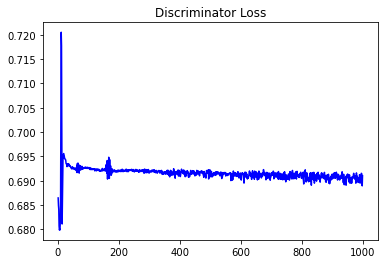

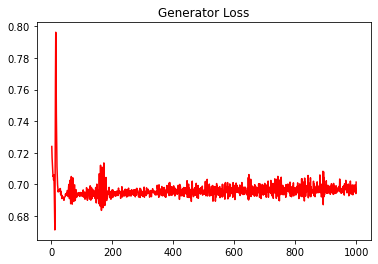

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5286540721818141


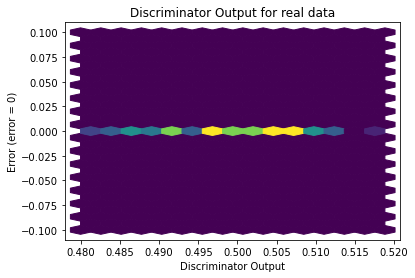

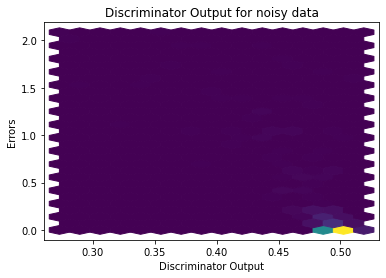

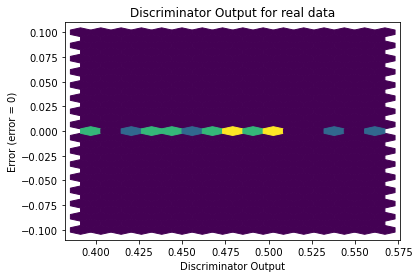

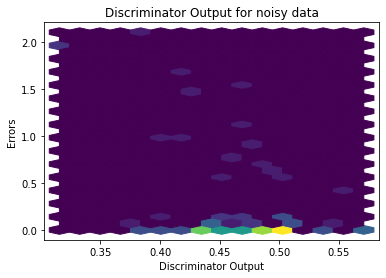

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


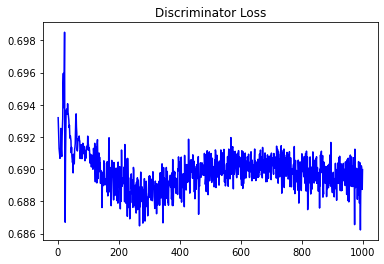

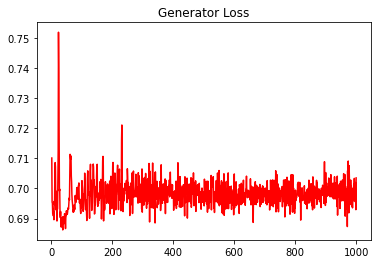

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6443417811839651


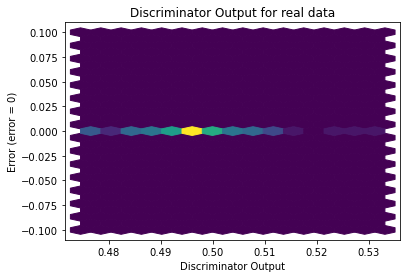

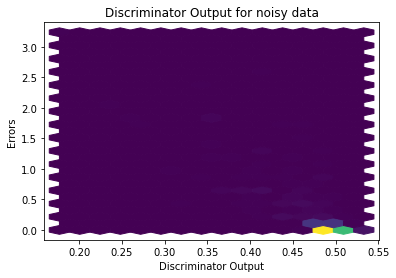

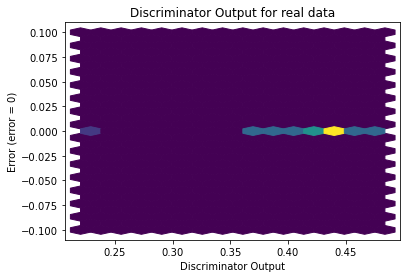

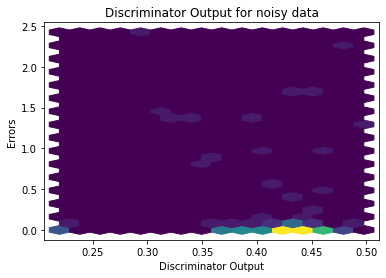

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2777]], requires_grad=True)
